<a href="https://www.kaggle.com/code/hmahida/eda-movies-dataset?scriptVersionId=118511432" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### load the movie dataset and create dataframes
movies_df= pd.read_csv('/kaggle/input/movies/movies.csv')

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

In [5]:
# Drop columns that are redundant or unnecessary
movies_df.drop(labels=['keywords','status','tagline','original_language','overview','production_companies','original_title'], axis=1, inplace=True)
movies_df

,budget,genres,homepage,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


In [6]:
# Remove any duplicate rows
movies_df.drop_duplicates(inplace=True)
movies_df

,budget,genres,homepage,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [7]:
# Discard rows with zero budget and/or zero revenue movies
movies_df.drop(movies_df[(movies_df.budget == 0) | (movies_df.revenue == 0)].index, inplace=True)
movies_df

,budget,genres,homepage,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [8]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date and add it in "movies_df" in a new column
movies_df['year'] = movies_df['release_date'].dt.year
movies_df

,budget,genres,homepage,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755,1994
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110,1972
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.primermovie.com,14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004


#### On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.


In [9]:
# Function to parse JSON columns.
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.tail()

,budget,genres,homepage,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
4773,27000,['Comedy'],http://www.miramax.com/movie/clerks/,2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994
4788,12000,"['Horror', 'Comedy', 'Crime']",NaN,692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Pink Flamingos,6.2,110,1972
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",NaN,36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,1997
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",http://www.primermovie.com,14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004
4798,220000,"['Action', 'Crime', 'Thriller']",NaN,9367,14.269792,"['Mexico', 'United States of America']",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1992


In [10]:
# Looking at the internate, it seems there is an error in movie budget data where the budgers are entered in two digits only. Amend the movie budgets in two digit by myltuplying with 100000.
movies_df.loc[(movies_df['budget'] < 100), 'budget'] = movies_df.budget*100000
movies_df.loc[(movies_df['title'] == 'I Married a Strange Person!'), 'budget'] = movies_df.budget*100000

<AxesSubplot:xlabel='budget', ylabel='title'>

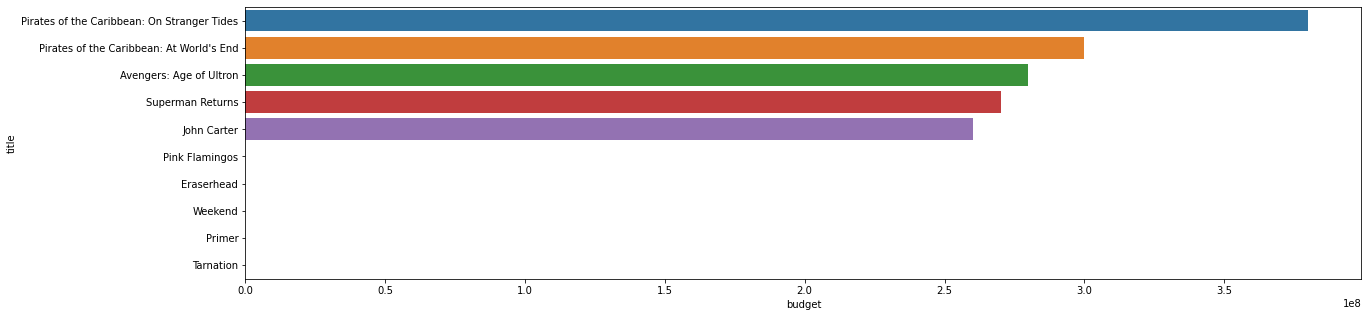

In [11]:
# Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare?

# Sort most expensive movied by budgets
most_expensive = movies_df.sort_values(by='budget', axis=0, ascending=False)

# Sort cheapest movied by budgets
cheapest = movies_df.sort_values(by='budget', axis=0, ascending=True)
# create a new dataframe with the top five most expensive and top five cheapest movies.
frames = [most_expensive.iloc[0:5,:], cheapest.iloc[0:5,:]]
expensive_cheapest= pd.concat(frames)
# sort the movies in decending order by budgets
expensive_cheapest.sort_values(by='budget', axis=0, ascending=False, inplace=True)
plt.figure(figsize=(20,5))
sns.barplot(data=expensive_cheapest, y='title', x='budget')

### Top 5 most expensive movies
- Pirates of the Caribbean: On Stranger Tides
- Pirates of the Caribbean:At World's End
- Avengers: Age of Uitron
- Superman Returns
- John Carter

The cheapest movies budgest are generally less than 1% of the budgets of the most exytensive movies.

<AxesSubplot:xlabel='profit', ylabel='title'>

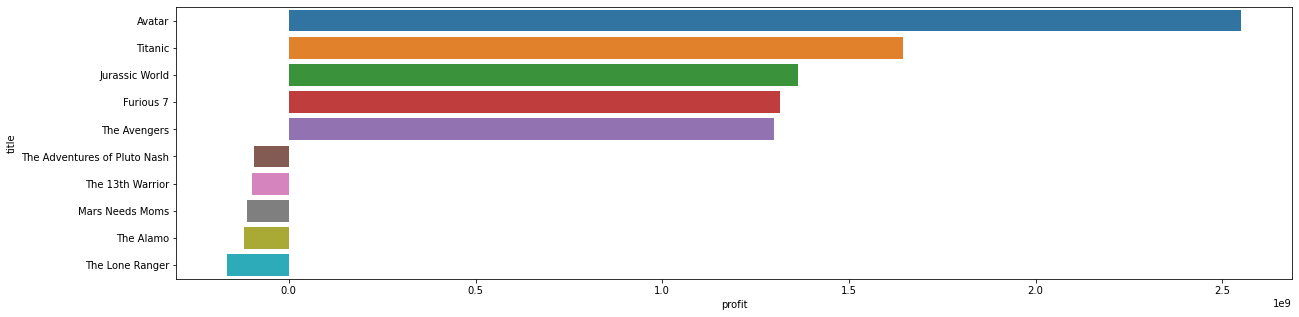

In [12]:
# Which are the top 5 most profitable movies? Compare the min and max profits.

# profit = revenue - budget
movies_title = movies_df.title
profit = movies_df.revenue - movies_df.budget
movies_df['profit'] = profit

most_profitable = movies_df.sort_values(by='profit', axis=0, ascending=False)
least_profitable = movies_df.sort_values(by='profit', axis=0, ascending=True)

frames = [most_profitable.iloc[0:5,:], least_profitable.iloc[0:5,:]]
movies_profit= pd.concat(frames)
movies_profit.sort_values(by='profit', axis=0, ascending=False, inplace=True)
plt.figure(figsize=(20,5))
sns.barplot(data=movies_profit, y='title', x='profit')

### Top 5 most profitable movies
- Avatar
- Titanic
- Jurassic World
- Furious 7
- The Avengers

From the bar chart aove, it seems the top lowest profit movides were actually loss making movies.

<AxesSubplot:xlabel='popularity', ylabel='title'>

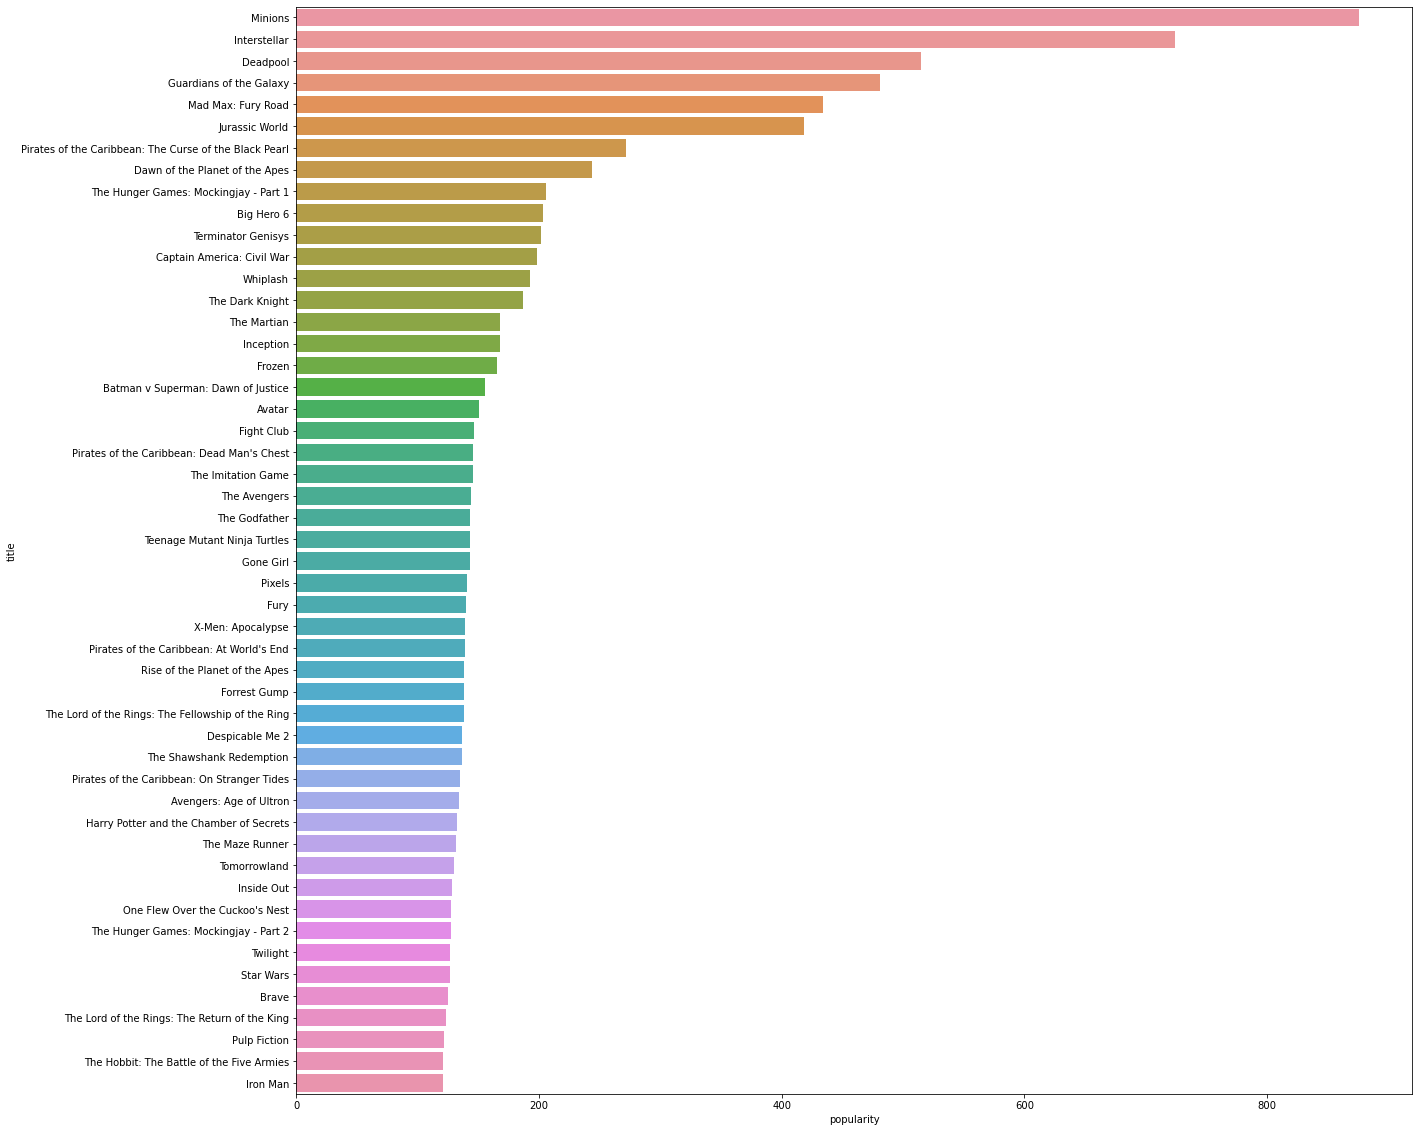

In [13]:
#Find the most talked about movies. Sort the dataframe based on the popularity column.
movies_df.sort_values(by='popularity', axis=0, ascending=False, inplace=True)
popular_movies = movies_df.head(50)
plt.figure(figsize=(20,20))
sns.barplot(data=popular_movies, y='title', x='popularity')

In [14]:
#Find Movies which are rated above 7
movies_df.sort_values('vote_average', axis=0, ascending=False, inplace=True)
top_rating = movies_df.loc[(movies_df.vote_average > 7), ['title', 'vote_average']] 
top_rating

,title,vote_average
2970,There Goes My Baby,8.5
1881,The Shawshank Redemption,8.5
3337,The Godfather,8.4
1818,Schindler's List,8.3
2731,The Godfather: Part II,8.3
...,...,...
3743,Leaving Las Vegas,7.1
3453,The Wood,7.1
3240,28 Days Later,7.1
4066,[REC],7.1


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [15]:
most_profitable_movies = most_profitable[['title', 'year', 'profit']]
most_profitable_movies.head(10)

,title,year,profit
0,Avatar,2009,2550965087
25,Titanic,1997,1645034188
28,Jurassic World,2015,1363528810
44,Furious 7,2015,1316249360
16,The Avengers,2012,1299557910
7,Avengers: Age of Ultron,2015,1125403694
124,Frozen,2013,1124219009
546,Minions,2015,1082730962
329,The Lord of the Rings: The Return of the King,2003,1024888979
31,Iron Man 3,2013,1015439994


<AxesSubplot:xlabel='year', ylabel='profit'>

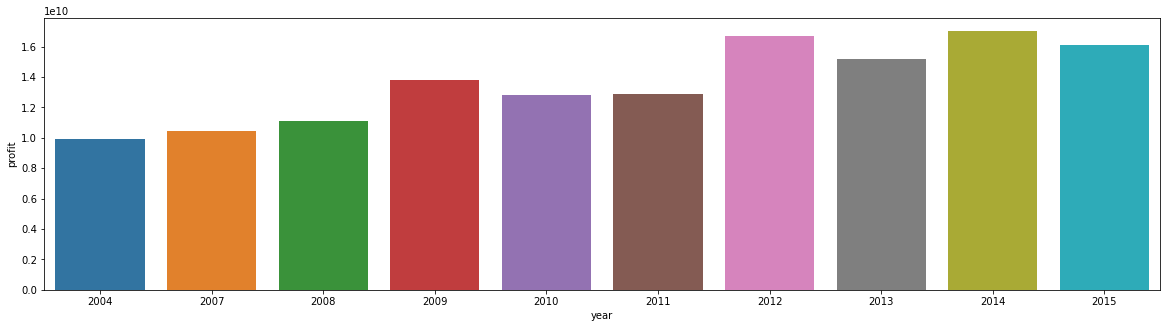

In [16]:
# Group the dataframe bt movies years and sum the values of profits in each year group.
movies_years = movies_df.groupby(by='year', axis=0).sum()
top_profit = movies_years.sort_values(by='profit', axis=0, ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(data=top_profit, x=top_profit.index, y='profit')

#### The table aboves shows the list of ten most profitable movies and the corrosponding movie release years. For the second approach, the bar chart above shows the years with the highest total profits from the movies released in the perticular year. From this chart, it seems the movies released in year 2014 provided combined highest profit.


Text(0.5, 0, 'Frequency')

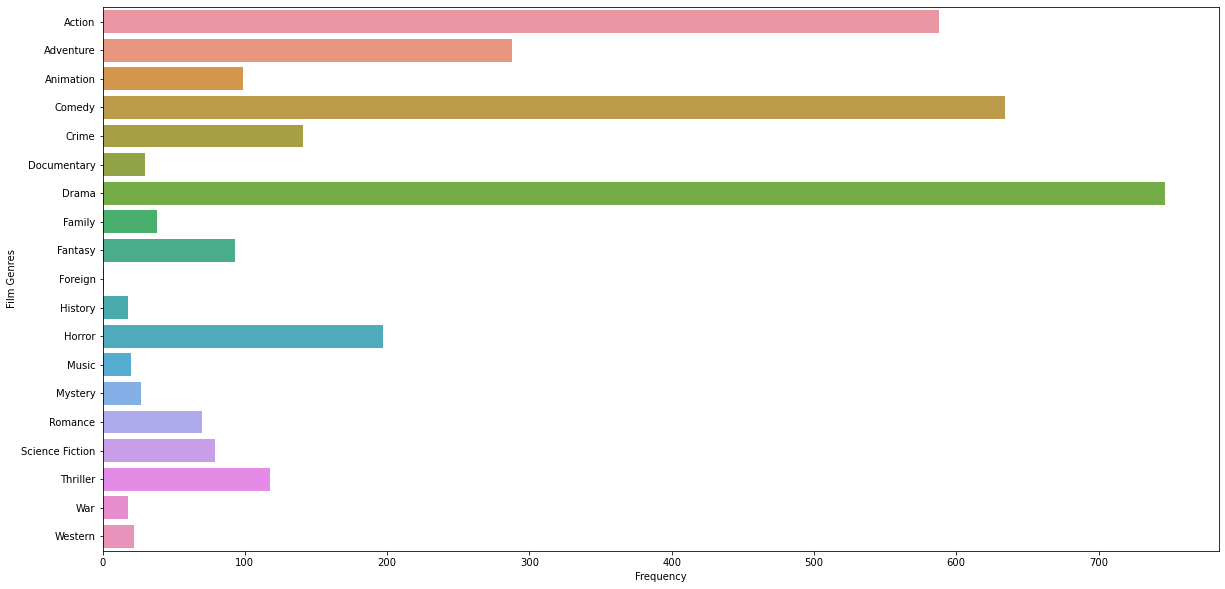

In [17]:
# Most successful genres — create a bar plot explaining the frequency of movies in each genre.
genres_list = movies_df['genres'].to_list()
genres_list_1 = []
for item in genres_list:
    i = item.split(',')[0].strip().replace("'","").replace('[','').replace(']','')
    genres_list_1.append(i)
genres_list_1.remove('')
genres_df = pd.DataFrame(genres_list_1)
#print(genres_df)
gen_data = genres_df.pivot_table(index = [0], aggfunc ='size')
gen_dataframe = pd.DataFrame(gen_data)
#print(gen_dataframe)
film_genres = gen_dataframe.iloc[:,0]
frequency = gen_dataframe.index
plt.figure(figsize=(20,10))
sns.barplot(data=gen_dataframe, x=film_genres, y=frequency)
plt.ylabel('Film Genres')
plt.xlabel('Frequency')

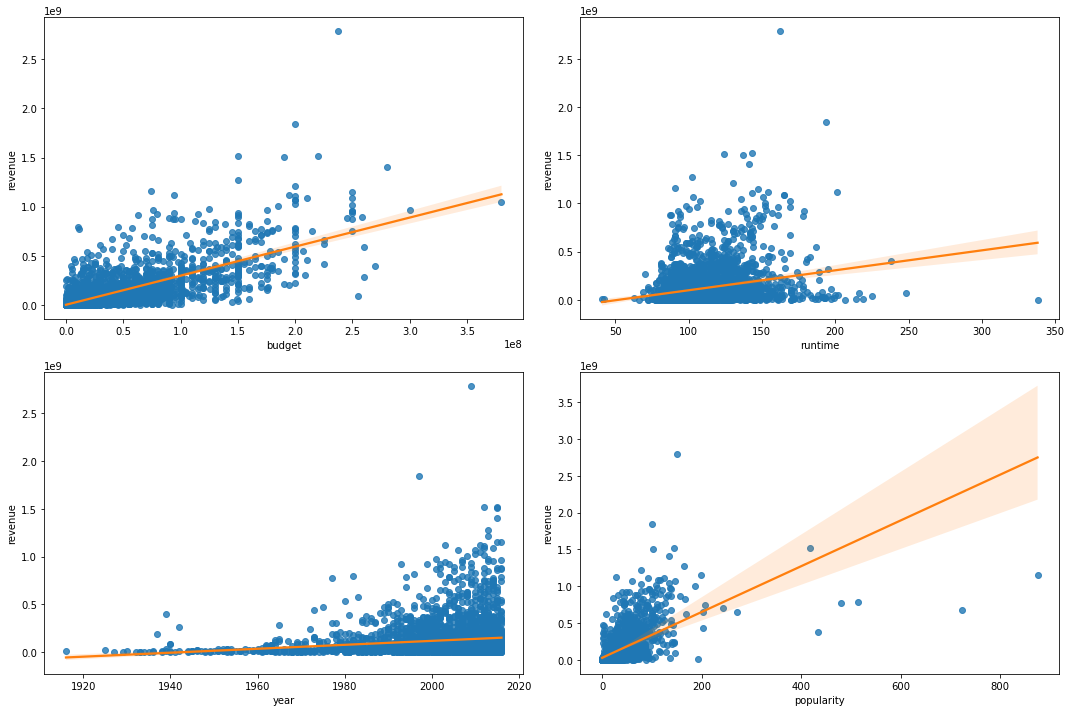

In [18]:
#### Generate three different interesting visualisations with a data story.

#popular movies vs runtime
#plt.figure(figsize=(40,5))
#sns.regplot(data=movies_df, x= popular_movies.title.head(10), y = 'runtime')


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
p_color = dict(color="C0")
l_color = dict(color="C1")
sns.regplot(data=movies_df, x="budget", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[0][0])
sns.regplot(data=movies_df, x="runtime", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[0][1])
sns.regplot(data=movies_df, x="year", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[1][0])
sns.regplot(data=movies_df, x="popularity", y="revenue", fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axes[1][1])
fig.tight_layout()

#### From the regplots above, it seems there is a positive correlation between film budget and revenue, with films with higher budget generally achieves more revenue. 

#### There is also a moderate positive correlation between movie runtime and revenue, with longer movies generally accumulating higher revenue. 

#### A film's release year doesn't seem to have much impact on the revenue it generates, so we cannot necessarily expect newer films to generate more revenue than older movies. 

#### Unsurprisingly, there is a strong positive corelation between a film's reevenue and it's popularity score.